In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import datetime

In [2]:
colnames = ["time_interval", "id_1", "id_2", "class_id_1", "class_id_2"]

df_2011 = pd.read_csv(
    "/Users/miric/Documents/GitHub/NetworkRugs/Miranda/thiers_2011.csv",
    sep="\t",
    header=None,
    names=colnames
)

# Convert seconds → HH:MM
df_2011["hh_mm"] = df_2011["time_interval"].apply(
    lambda x: str(datetime.timedelta(seconds=int(x)))  # remove :ss
)

print("2011 interactions:")
display(df_2011)
print()


df_2012 = pd.read_csv(
    "/Users/miric/Documents/GitHub/NetworkRugs/Miranda/thiers_2012.csv",
    sep="\t",
    header=None,
    names=colnames
)

df_2012["hh_mm"] = df_2012["time_interval"].apply(
    lambda x: str(datetime.timedelta(seconds=int(x)))
)

print("2012 interactions:")
display(df_2012)




2011 interactions:


,time_interval,id_1,id_2,class_id_1,class_id_2,hh_mm
0,54120,26,66,PC,PC,15:02:00
1,54140,26,66,PC,PC,15:02:20
2,54160,24,25,PC,PC,15:02:40
3,54160,100,37,PC,PC,15:02:40
4,54180,37,57,PC,PC*,15:03:00
...,...,...,...,...,...,...
28556,326130,81,75,PC,PC,"3 days, 18:35:30"
28557,326150,81,75,PC,PC,"3 days, 18:35:50"
28558,326210,81,75,PC,PC,"3 days, 18:36:50"
28559,326270,88,125,PC,PC,"3 days, 18:37:50"



2012 interactions:


,time_interval,id_1,id_2,class_id_1,class_id_2,hh_mm
0,1353303380,1170,1644,MP*1,MP*1,"15663 days, 5:36:20"
1,1353303400,1170,1613,MP*1,MP*1,"15663 days, 5:36:40"
2,1353303640,1170,1644,MP*1,MP*1,"15663 days, 5:40:40"
3,1353303760,1181,1651,MP*1,MP*1,"15663 days, 5:42:40"
4,1353303840,1108,1190,MP*1,MP*1,"15663 days, 5:44:00"
...,...,...,...,...,...,...
45042,1354032580,880,887,PC*,PC*,"15671 days, 16:09:40"
45043,1354032580,854,869,PSI*,PSI*,"15671 days, 16:09:40"
45044,1354032600,880,887,PC*,PC*,"15671 days, 16:10:00"
45045,1354032760,620,669,MP*2,MP*2,"15671 days, 16:12:40"


# Data exploration

In [17]:
G_2011 = nx.from_pandas_edgelist(df_2011, "id_1", "id_2")

print("2011 network data:")
print(f"Number of nodes: {G_2011.number_of_nodes()}")
print(f"Number of edges: {G_2011.number_of_edges()}")

num_unique_intervals = df_2011["time_interval"].nunique()
print(f"Number of timestamps: {num_unique_intervals}")


G_2012 = nx.from_pandas_edgelist(df_2012, "id_1", "id_2")

print()
print("2012 network data:")
print(f"Number of nodes: {G_2012.number_of_nodes()}")
print(f"Number of edges: {G_2012.number_of_edges()}")

num_unique_intervals = df_2012["time_interval"].nunique()
print(f"Number of timestamps: {num_unique_intervals}")



2011 network data:
Number of nodes: 126
Number of edges: 1710
Number of timestamps: 5609

2012 network data:
Number of nodes: 180
Number of edges: 2220
Number of timestamps: 11273


In [25]:
top_intervals_2011 = df_2011["time_interval"].value_counts().head(30)

print("Top 30 most active time intervals for 2011 data:")
print(top_intervals_2011)

top_intervals_2012 = df_2012["time_interval"].value_counts().head(30)

print()
print("Top 30 most active time intervals for 2012 data:")
print(top_intervals_2012)



Top 30 most active time intervals for 2011 data:
time_interval
62860     38
62880     37
62900     35
62800     33
235320    32
62700     32
62960     32
235500    32
62780     30
235360    30
62840     30
62720     30
235520    30
235160    29
149420    29
315720    28
62820     28
323240    28
54940     28
323380    28
149400    28
315860    28
235600    28
62640     28
235740    27
235480    27
62980     27
315820    27
235620    27
235780    27
Name: count, dtype: int64

Top 30 most active time intervals for 2012 data:
time_interval
1353657040    40
1353657120    38
1353311960    37
1353657480    36
1353312080    35
1353311880    35
1353571160    35
1353657260    35
1353657500    35
1353657340    35
1353311660    35
1353657180    34
1353657060    34
1353657080    34
1353657020    34
1353571140    33
1353657300    32
1353916580    32
1353657200    32
1353657140    32
1353657280    31
1353657240    31
1353657520    31
1353311700    31
1353312000    31
1353571040    30
1353916660    3

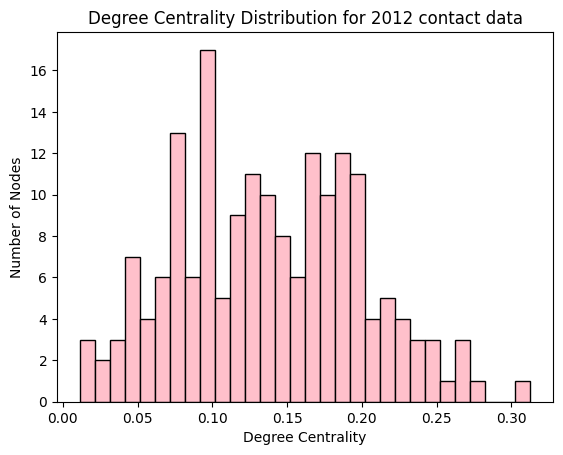

[(826, 0.3128491620111732),
 (683, 0.27932960893854747),
 (620, 0.2681564245810056),
 (641, 0.26256983240223464),
 (860, 0.26256983240223464),
 (1657, 0.2569832402234637),
 (681, 0.25139664804469275),
 (661, 0.2458100558659218),
 (869, 0.2458100558659218),
 (692, 0.2346368715083799)]

In [22]:
# Degree centrality measures how connected each node is relative to the total possible connections
centrality = nx.degree_centrality(G_2012)

# Sort nodes by centrality descending
top_nodes = dict(sorted(centrality.items(), key=lambda item: item[1], reverse=True))
top_10 = list(top_nodes.items())[:10]


plt.hist(list(centrality.values()), bins =30,  color='pink', edgecolor='black')
plt.xlabel("Degree Centrality")
plt.ylabel("Number of Nodes")
plt.title("Degree Centrality Distribution for 2012 contact data")
plt.show()

top_10



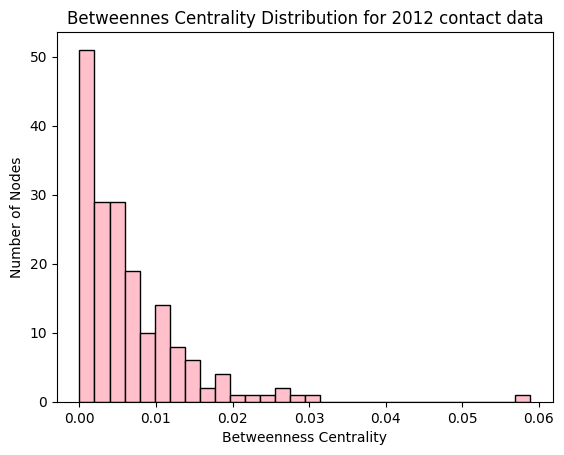

[(826, 0.05891680646992869),
 (620, 0.029566243348582086),
 (860, 0.0286711660373446),
 (641, 0.02667279796142687),
 (1657, 0.025820225297560437),
 (683, 0.02400967829302763),
 (887, 0.02188627585862163),
 (1678, 0.02005998346799868),
 (1662, 0.019496551784751417),
 (869, 0.019395772204075446)]

In [21]:
# Betweenness centrality measures how often a node lies on the shortest paths between other nodes - nodes that bridge groups
bet_centrality = nx.betweenness_centrality(G_2012)

top_nodes_bet = dict(sorted(bet_centrality.items(), key=lambda item: item[1], reverse=True))
top_10_bet = list(top_nodes_bet.items())[:10]

plt.hist(list(bet_centrality.values()), bins = 30, color='pink', edgecolor='black')
plt.xlabel("Betweenness Centrality")
plt.ylabel("Number of Nodes")
plt.title("Betweennes Centrality Distribution for 2012 contact data")
plt.show()

top_10_bet

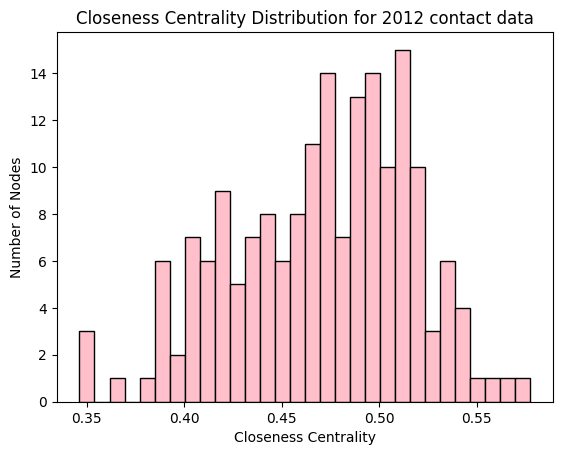

[(826, 0.5774193548387097),
 (683, 0.5646687697160884),
 (681, 0.557632398753894),
 (636, 0.5507692307692308),
 (860, 0.5440729483282675),
 (654, 0.5424242424242425),
 (1657, 0.5424242424242425),
 (635, 0.540785498489426),
 (869, 0.5359281437125748),
 (641, 0.5359281437125748)]

In [20]:
# Nodes closest to all others
close_centrality = nx.closeness_centrality(G_2012)

top_nodes_cl = dict(sorted(close_centrality.items(), key=lambda item: item[1], reverse=True))
top_10_cl = list(top_nodes_cl.items())[:10]

plt.hist(list(close_centrality.values()), bins = 30, color='pink', edgecolor='black')
plt.xlabel("Closeness Centrality")
plt.ylabel("Number of Nodes")
plt.title("Closeness Centrality Distribution for 2012 contact data")
plt.show()

top_10_cl

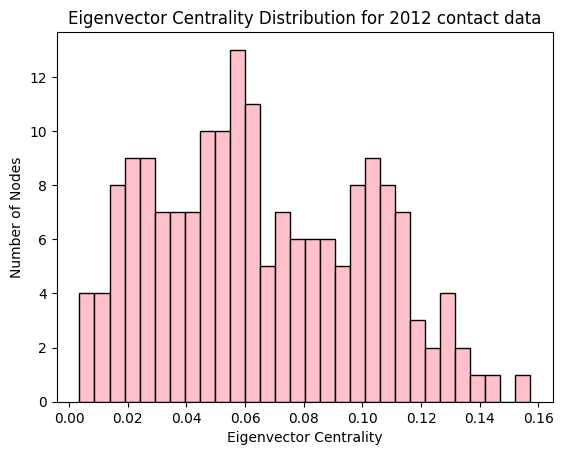

[(683, 0.15726929795547473),
 (826, 0.14349601587250654),
 (681, 0.13819175842299417),
 (1657, 0.13225007664528726),
 (661, 0.13189706629965775),
 (654, 0.130555004557456),
 (692, 0.12861638343563964),
 (620, 0.12690312967441847),
 (623, 0.12687230066909164),
 (1674, 0.1252348813481569)]

In [19]:
# Nodes connected to other important nodes
eig_centrality = nx.eigenvector_centrality(G_2012)

top_nodes_eig = dict(sorted(eig_centrality.items(), key=lambda item: item[1], reverse=True))
top_10_eig = list(top_nodes_eig.items())[:10]

plt.hist(list(eig_centrality.values()), bins = 30, color='pink', edgecolor='black')
plt.xlabel("Eigenvector Centrality")
plt.ylabel("Number of Nodes")
plt.title("Eigenvector Centrality Distribution for 2012 contact data")
plt.show()

top_10_eig

Sampled timestamps: [1353303380 1353479900 1353674180 1354032880]


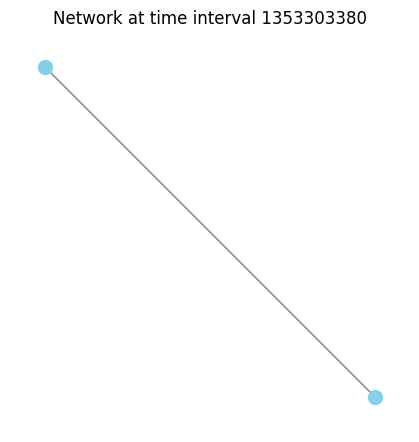

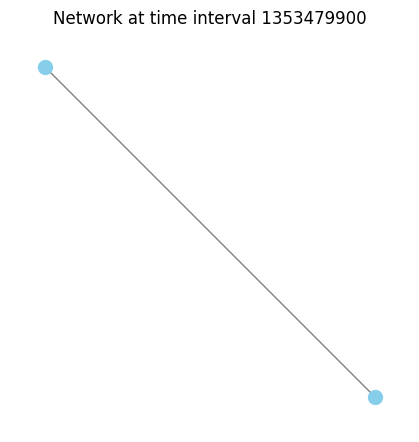

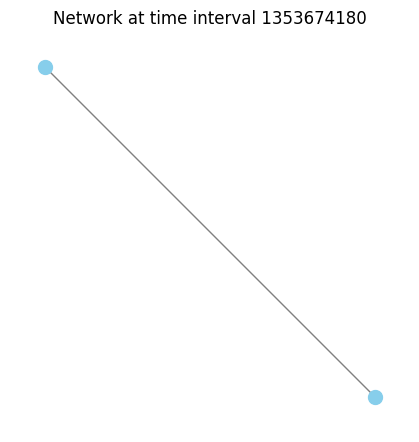

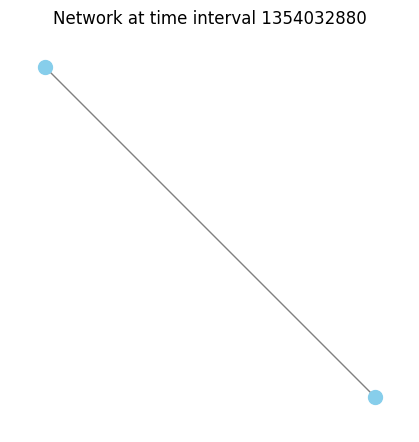

In [30]:
# Get all unique time intervals
unique_intervals = np.sort(df_2012["time_interval"].unique())

# Sample 10 evenly spaced timestamps
sampled_intervals = np.linspace(0, len(unique_intervals)-1, 4, dtype=int)
sampled_intervals = unique_intervals[sampled_intervals]

print("Sampled timestamps:", sampled_intervals)

for t in sampled_intervals:
    # Subset dataframe for this timestamp
    df_t = df_2012[df_2012["time_interval"] == t]
    
    # Build network
    G_t = nx.from_pandas_edgelist(df_t, "id_1", "id_2")
    
    # Plot
    plt.figure(figsize=(4, 4))
    pos = nx.spring_layout(G_t, seed=42)  # force-directed layout
    nx.draw(
        G_t, pos,
        node_color='skyblue',
        edge_color='gray',
        node_size=100,
        with_labels=False
    )
    plt.title(f"Network at time interval {t}")
    plt.show()


## Looking at timestamps with at least 5 interactions simulatenously

Selected timestamps with enough interactions: Index([1353304160, 1353408340, 1353666700, 1354025280], dtype='int64', name='time_interval')


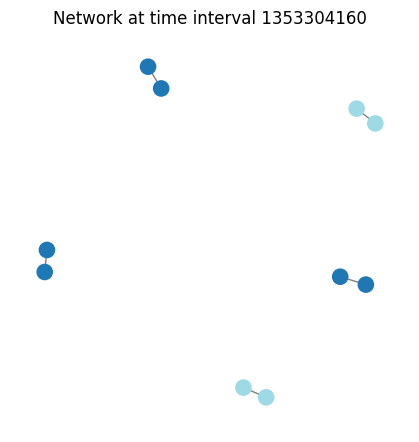

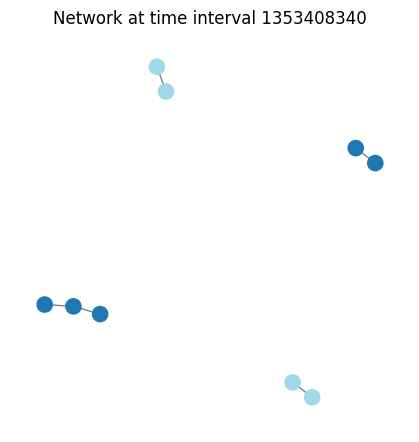

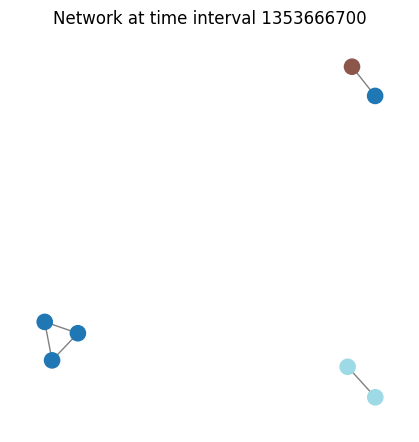

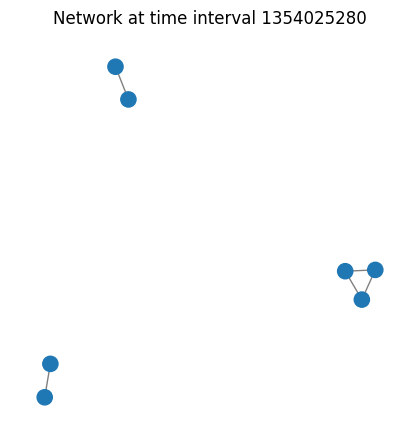

In [ ]:
# Count number of interactions per timestamp
interactions_per_interval = df_2012.groupby("time_interval").size()

# Keep only timestamps with >= 5 interactions
valid_intervals = interactions_per_interval[interactions_per_interval >= 5].index

# Sample 4 timestamps from these
sampled_intervals = np.linspace(0, len(valid_intervals)-1, 4, dtype=int)
sampled_intervals = valid_intervals[sampled_intervals]

print("Selected timestamps with enough interactions:", sampled_intervals)

for t in sampled_intervals:
    df_t = df_2012[df_2012["time_interval"] == t]

    # Build graph
    G_t = nx.from_pandas_edgelist(df_t, "id_1", "id_2")

    # ---- Assign class to each node ----
    class_map = {}

    for _, row in df_t.iterrows():
        class_map[row["id_1"]] = row["class_id_1"]
        class_map[row["id_2"]] = row["class_id_2"]

    nx.set_node_attributes(G_t, class_map, "class")

    # Convert class labels to numeric codes for coloring
    classes = nx.get_node_attributes(G_t, "class")
    unique_classes = sorted(set(classes.values()))
    class_to_color = {c: i for i, c in enumerate(unique_classes)}

    node_colors = [class_to_color[classes[n]] for n in G_t.nodes()]

    plt.figure(figsize=(4, 4))
    pos = nx.spring_layout(G_t, seed=42)

    nx.draw(
        G_t, pos,
        node_color=node_colors,
        cmap="tab20",     # 20 distinct colors
        edge_color="gray",
        node_size=120,
        with_labels=False
    )

    plt.title(f"Network at time interval {t}")
    plt.show()


## Busiest timestamps

Top 10 busiest timestamps: [1353657040, 1353657120, 1353311960, 1353657480, 1353312080, 1353311880, 1353571160, 1353657260, 1353657500, 1353657340]


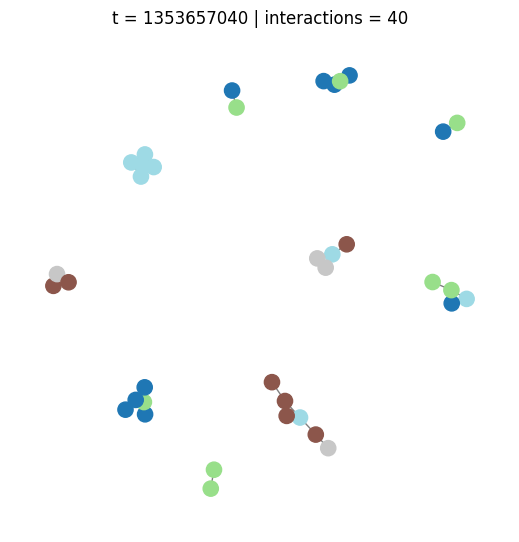

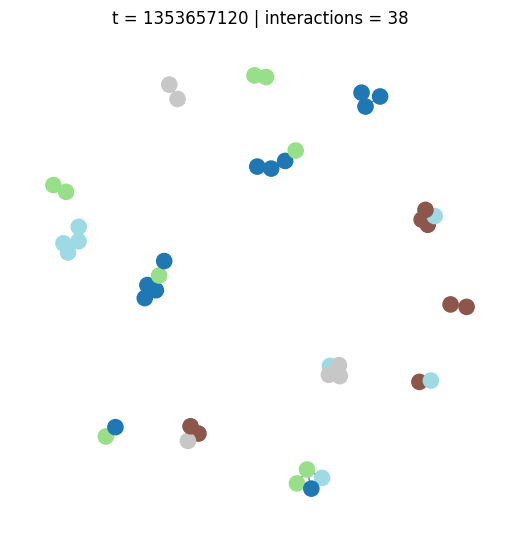

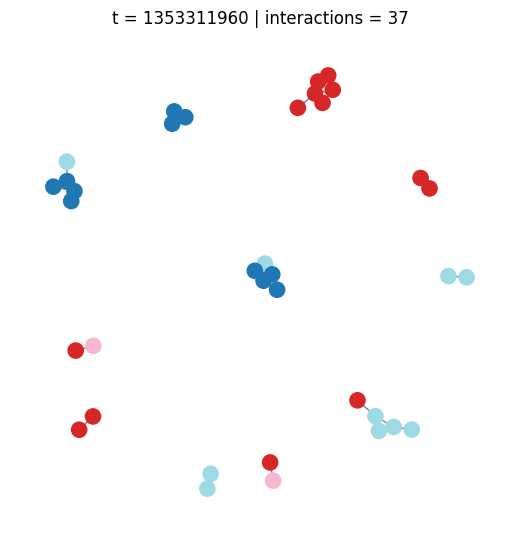

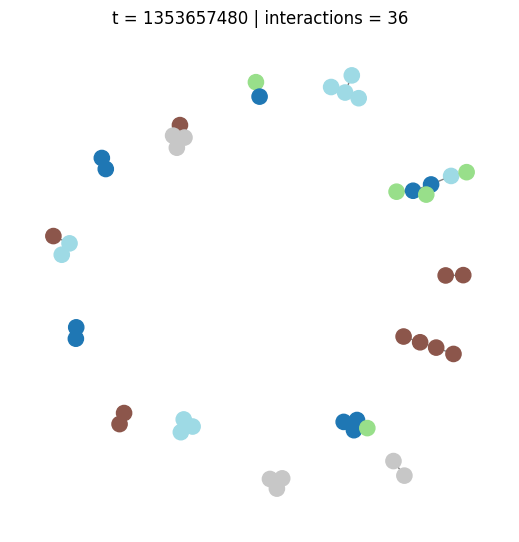

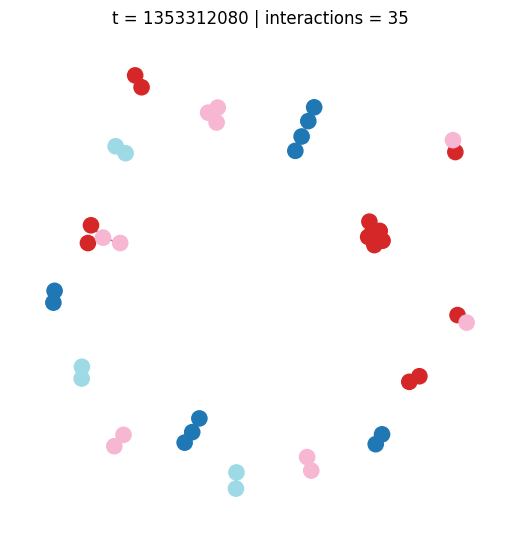

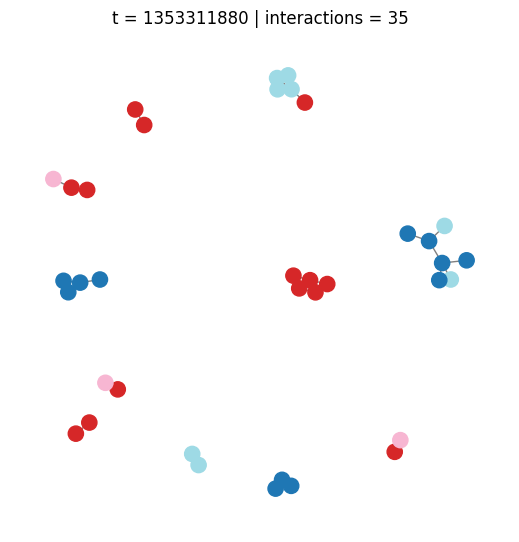

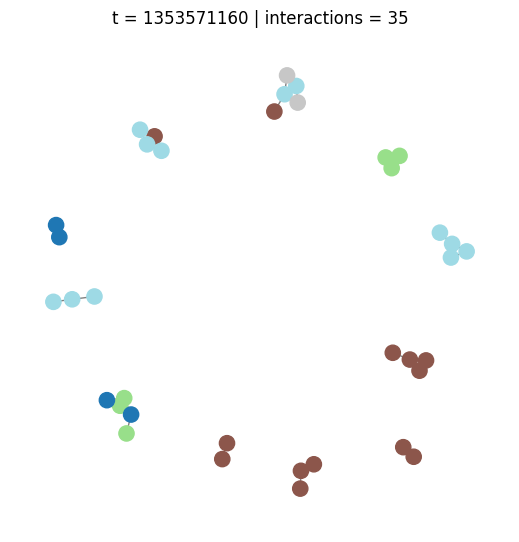

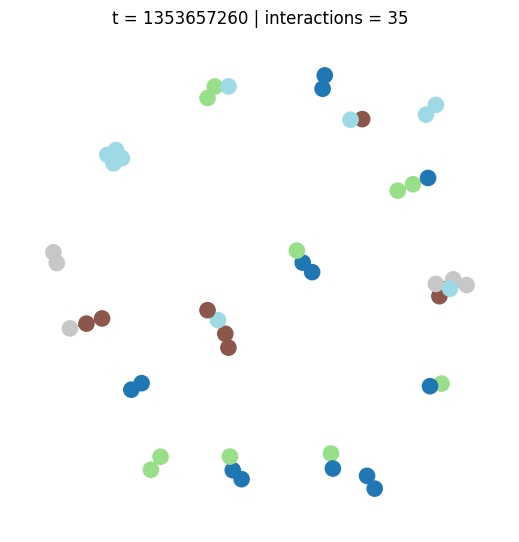

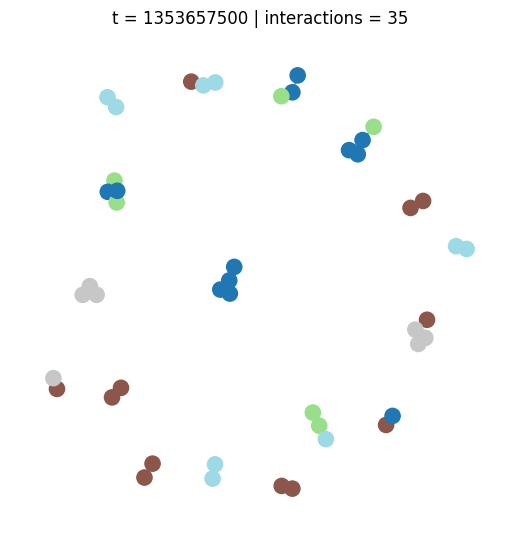

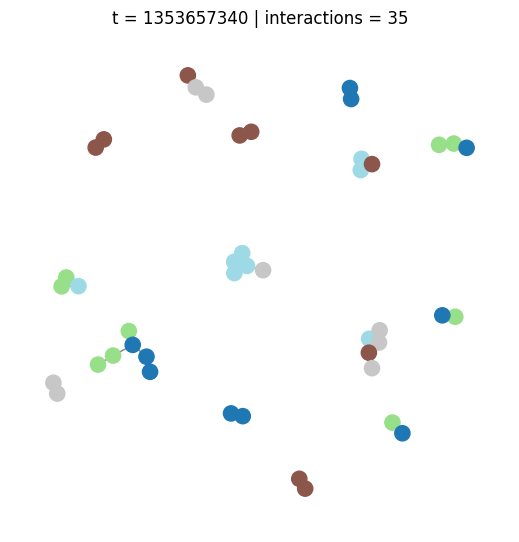

In [37]:
# Count number of interactions per timestamp
interactions_per_interval = df_2012.groupby("time_interval").size()

# Select the 4 timestamps with the highest interaction counts
top_intervals = interactions_per_interval.sort_values(ascending=False).head(10).index

print("Top 10 busiest timestamps:", top_intervals.tolist())

for t in top_intervals:
    df_t = df_2012[df_2012["time_interval"] == t]

    # Build graph
    G_t = nx.from_pandas_edgelist(df_t, "id_1", "id_2")

    # Assign class to each node
    class_map = {}

    for _, row in df_t.iterrows():
        class_map[row["id_1"]] = row["class_id_1"]
        class_map[row["id_2"]] = row["class_id_2"]

    nx.set_node_attributes(G_t, class_map, "class")

    # Convert class labels to numeric codes for coloring
    classes = nx.get_node_attributes(G_t, "class")
    unique_classes = sorted(set(classes.values()))
    class_to_color = {c: i for i, c in enumerate(unique_classes)}

    node_colors = [class_to_color[classes[n]] for n in G_t.nodes()]

    plt.figure(figsize=(5, 5))
    pos = nx.spring_layout(G_t, seed=42)

    nx.draw(
        G_t, pos,
        node_color=node_colors,
        cmap="tab20",
        edge_color="gray",
        node_size=120,
        with_labels=False
    )

    num_interactions = len(df_t)

    plt.title(f"t = {t} | interactions = {num_interactions}")
    plt.show()


## Converting 2012 data into json file

In [38]:
import json

result = {}

# Group by timestamp
for t, df_t in df_2012.groupby("time_interval"):

    # Create node attributes
    nodes = {}

    for _, row in df_t.iterrows():
        # Add id_1
        if row["id_1"] not in nodes:
            nodes[row["id_1"]] = {
                "id": int(row["id_1"]),
                "class_id": row["class_id_1"]
            }
        # Add id_2
        if row["id_2"] not in nodes:
            nodes[row["id_2"]] = {
                "id": int(row["id_2"]),
                "class_id": row["class_id_2"]
            }

    # Convert dict → list
    nodes_list = list(nodes.values())

    # Create edges
    links_list = []
    for _, row in df_t.iterrows():
        links_list.append({
            "source": int(row["id_1"]),
            "target": int(row["id_2"]),
            "weight": 1
        })

    # Insert into final structure under key "t_<timestamp>"
    result[f"t_{t}"] = {
        "nodes": nodes_list,
        "links": links_list
    }

# Save to JSON
with open("data/contact_pattern_2012.json", "w") as f:
    json.dump(result, f, indent=4)


## Computing Jaccard similarity to determine how to split timestamps

Measures how similar two sets are. In the context of a network with timestamps, it shows how much overlap there is between the sets of connections or events at different timestamps.

- If the similarity is high, the timestamps have similar interactions, so we might merge or pick one.

- If the similarity is low, the timestamps are different, so we might keep both to capture distinct network states.

In [8]:
# Build an edge-set per timestamp (lighter than creating a graph per timestamp - over 10.000 timestamps)
from collections import defaultdict

# Dictionary: timestamp -> set of (id_1, id_2)
edges_by_time = defaultdict(set)

for _, row in df_2012.iterrows():
    t = row["time_interval"]
    edge = tuple(sorted((row["id_1"], row["id_2"])))   # sort to avoid direction issues
    edges_by_time[t].add(edge)

# edges_by_time


In [ ]:
# Compute Jaccard similarity between consecutive timestamps
timestamps = sorted(edges_by_time.keys()) # compare consecutive times in order

jaccard_scores = []

for i in range(len(timestamps) - 1):
    t1, t2 = timestamps[i], timestamps[i+1]
    e1, e2 = edges_by_time[t1], edges_by_time[t2]
    
    if len(e1) == 0 and len(e2) == 0:
        score = 1.0
    else:
        score = len(e1 & e2) / len(e1 | e2)
    
    jaccard_scores.append((t1, t2, score))


In [ ]:
# Turn result into dataframe

df_jaccard = pd.DataFrame(jaccard_scores, columns=["t1", "t2", "jaccard"])
display(df_jaccard)

# Counting how many timestamps are under the 0.9 threshold (1 is identical, 0.9 almost the same)

low_similarity_count_09 = (df_jaccard['jaccard'] < 0.9).sum()
print(low_similarity_count_09)

low_similarity_count_06 = (df_jaccard['jaccard'] < 0.6).sum()
print(low_similarity_count_06)

low_similarity_count_06 = (df_jaccard['jaccard'] < 0.6).sum()
print(low_similarity_count_06)


,t1,t2,jaccard
0,1353303380,1353303400,0.000000
1,1353303400,1353303640,0.000000
2,1353303640,1353303760,0.000000
3,1353303760,1353303840,0.000000
4,1353303840,1353304000,0.000000
...,...,...,...
11267,1354032460,1354032560,0.333333
11268,1354032560,1354032580,0.500000
11269,1354032580,1354032600,0.250000
11270,1354032600,1354032760,0.000000


9952
8112


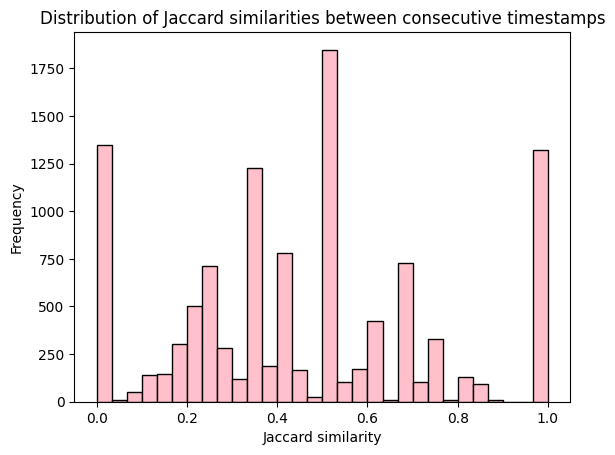

In [15]:
# how many consecutive timestamps are very similar, moderately similar, or very different

plt.hist(df_jaccard['jaccard'], bins=30, color='pink', edgecolor='black')
plt.xlabel('Jaccard similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Jaccard similarities between consecutive timestamps')
plt.show()


### Choosing the threshold
Look for a natural “gap” or drop in the histogram where similarity values are sparse